In [1]:
# Data visualization and analysis notebook for Housing Prices
#Trying to get a handle on the data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os


In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


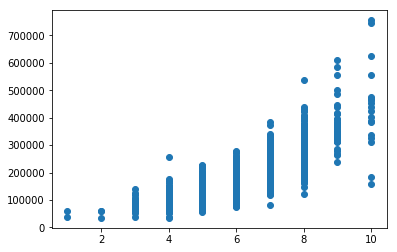

In [7]:
plt.scatter(train.OverallQual,train.SalePrice)

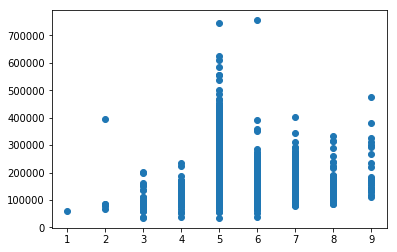

In [4]:
plt.scatter(train.OverallCond,train.SalePrice)

In [72]:
qual = train[(train.OverallQual==6) & (train.OverallCond==5) & (train.LotArea<20000)]

In [49]:
train.groupby('MSSubClass')['Id'].nunique()

MSSubClass
20     536
30      69
40       4
45      12
50     144
60     299
70      60
75      16
80      58
85      20
90      52
120     87
160     63
180     10
190     30
Name: Id, dtype: int64

In [61]:
train_class = []
classmean = []
classstd = []
val = list(set(train.MSSubClass.values))
val.sort()
for x in val:
    train_class.append(train[train.MSSubClass==x])
    classmean.append(train[train.MSSubClass==x]['SalePrice'].mean())
    classstd.append(train[train.MSSubClass==x]['SalePrice'].std())
    

<ErrorbarContainer object of 3 artists>

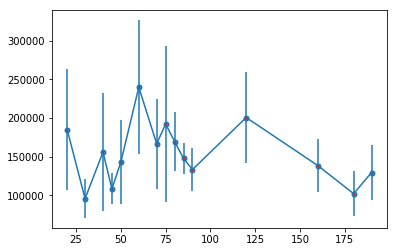

In [66]:
plt.errorbar(val,classmean,classstd, marker='o', mfc='red', ms=2, mew=4)

In [67]:
train.groupby(['MSSubClass'])['SalePrice'].agg(lambda x: x.unique().sum()/x.nunique())

MSSubClass
20     198626.358166
30      96521.947368
40     156125.000000
45     110554.545455
50     149238.436364
60     250368.233645
70     167469.351852
75     192437.500000
80     170871.836735
85     148372.222222
90     134242.086957
120    201608.395062
160    139207.403846
180    102300.000000
190    128157.142857
Name: SalePrice, dtype: float64

In [73]:
train.select_dtypes('object')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
5,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,Shed,WD,Normal
6,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
7,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,...,Attchd,RFn,TA,TA,Y,NaN,NaN,Shed,WD,Normal
8,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,...,Detchd,Unf,Fa,TA,Y,NaN,NaN,NaN,WD,Abnorml
9,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,...,Attchd,RFn,Gd,TA,Y,NaN,NaN,NaN,WD,Normal


In [68]:
classmean

[185224.81156716417,
 95829.72463768115,
 156125.0,
 108591.66666666667,
 143302.97222222222,
 239948.5016722408,
 166772.41666666666,
 192437.5,
 169736.55172413794,
 147810.0,
 133541.07692307694,
 200779.0804597701,
 138647.38095238095,
 102300.0,
 129613.33333333333]

In [76]:
train.drop(['Alley',],axis=1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [3]:
train.MSSubClass

0        60
1        20
2        60
3        70
4        60
5        50
6        20
7        60
8        50
9       190
10       20
11       60
12       20
13       20
14       20
15       45
16       20
17       90
18       20
19       20
20       60
21       45
22       20
23      120
24       20
25       20
26       20
27       20
28       20
29       30
       ... 
1430     60
1431    120
1432     30
1433     60
1434     20
1435     20
1436     20
1437     20
1438     20
1439     60
1440     70
1441    120
1442     60
1443     30
1444     20
1445     85
1446     20
1447     60
1448     50
1449    180
1450     90
1451     20
1452    180
1453     20
1454     20
1455     60
1456     20
1457     70
1458     20
1459     20
Name: MSSubClass, Length: 1460, dtype: int64

(array([ 76.,  98., 210., 431., 324., 161.,  66.,  33.,  10.,  14.,   5.,
          7.,   2.,   1.,   3.,   2.,   2.,   1.,   1.,   0.,   1.,   1.,
          1.,   0.,   3.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([  1300.  ,   3439.45,   5578.9 ,   7718.35,   9857.8 ,  11997.25,
         14136.7 ,  16276.15,  18415.6 ,  20555.05,  22694.5 ,  24833.95,
         26973.4 ,  29112.85,  31252.3 ,  33391.75,  35531.2 ,  37670.65,
         39810.1 ,  41949.55,  44089.  ,  46228.45,  48367.9 ,  50507.35,
         52646.8 ,  54

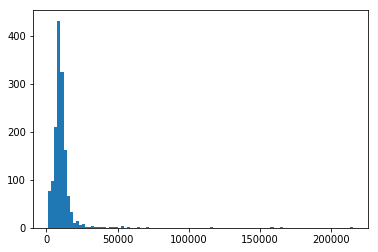

In [7]:
plt.hist(train.LotArea,100)

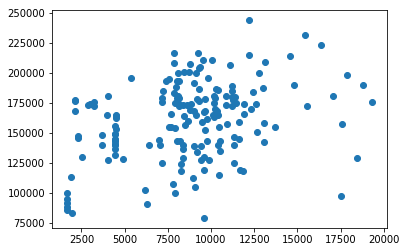

In [73]:
plt.scatter(qual.LotArea,qual.SalePrice)

(array([ 3.,  3.,  3.,  8., 13., 13., 15., 25., 29., 37., 59., 65., 75.,
        75., 95., 82., 85., 78., 75., 65., 53., 52., 49., 45., 32., 26.,
        31., 15., 16., 32., 13., 11., 18.,  8., 12.,  6.,  7.,  4.,  2.,
         6.,  3.,  7.,  5.,  6.,  5.,  3.,  2.,  4.,  4.,  4.,  4.,  4.,
         4.,  2.,  3.,  2.,  5.,  1.,  3.,  2.,  4.,  2.,  7.,  1.,  2.,
         2.,  4.,  3.,  1.,  4.,  1.,  0.,  0.,  4.,  2.,  0.,  1.,  1.,
         0.,  1.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 1.39044091,  2.33038265,  3.2703244 ,  4.21026614,  5.15020789,
         6.09014963,  7.03009138,  7.97003312,  8.90997487,  9.84991661,
        10.78985836, 11.7298001 , 12.66974185, 13.60968359, 14.54962534,
        15.48956708, 16.42950882, 17.36945057, 18.30939231, 19.24933406,
        20.1892758 , 21.12921755, 22.06915929, 23.00910104, 23.94904278,
        24.88898453, 25.82892627, 26.76886802, 27.70880976, 28.648751

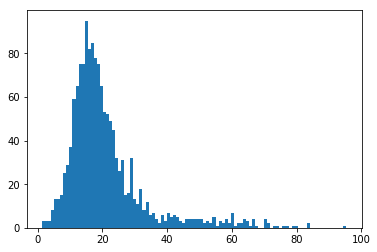

In [4]:
plt.hist(train.SalePrice/train.LotArea,100)